**TUNISIAN PLATE RECOGNITION: ZINDI COMPETITION Computer Vision for License Plate Recognition Challenge** 

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [ ]:
from keras.utils import to_categorical

def read_result(r):
  """
  function to read the result from read_img: r is array of 2 elements 
  and return the final result which will be submited
  """

  a=''
  b=[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]
  result=r.copy() #i don't want to affect my original input

  
  if len(result[1])==3:
    result.insert(1,'0')

  if len(result[0])==2:
    result.insert(0,'0')

  if len(result[0])<2 or len(result[1])<3:
    return b
  
  for i in result:
    a+=i  
  a=[*a]
  final= to_categorical(a,num_classes=10)
  if len(result[0])<3:
    final[0][0]=0

  return final


In [ ]:
import easyocr
import cv2
reader=easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
test=cv2.imread("/content/results/result_1020.png")
cv2_imshow(test) 

In [ ]:
!mkdir results
#here i put all the images after cropping by yolo

In [ ]:
def clean(s):
  s=s.replace(' ','')
  return re.sub('\D', '', s)
#regex for ignoring all the characters except the numerical

In [ ]:
import re
import os
from google.colab.patches import cv2_imshow

def read_img(path):
  """
  function to read img cropped after YOLO and return a 2 element array
  depending on the result of easy_ocr function

  """
  img=cv2.imread(path)
  img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  result =reader.readtext(img,detail=0)
  
  if len(result)==2:
    
    result[0]=clean(result[0])
    if len(result[0])>3:
      result[0]=result[0][:3]
    
    result[1]=clean(result[1])
    if len(result[1])>4:
      result[1]=result[1][-4:]
    
    return result

  elif len(result)==1:
    result[0]=clean(result[0])
    if len(result[0])>=7:
      return [result[0][0:3],result[0][-4:]]
    else:
      return [result[0][0:len(result[0])//2],result[0][-len(result[0])//2:]]

  if len(result)==3:
    return [clean(result[0]),clean(result[2])]
  else:
    return 'not length'



In [ ]:
l=0
for i in os.listdir('results'):
  if type(read_img(f'results/{i}'))!=str:
    print(i,read_img(f'results/{i}'))
    globals()[f'{i[0:-4]}']=read_img(f'results/{i}')
    l=l+1
#when I uploaded the images from my local to colab after cropping by YOLO, so i made each variable image to reorder them: 901,902,903....

result_983.png ['788', '7083']
result_982.png ['132', '820']
result_942.png ['161', '3747']
result_1083.png ['852', '903']
result_948.png ['174', '4999']
result_958.png ['96', '5370']
result_1053.png ['190', '9848']
result_1082.png ['632', '2788']
result_1020.png ['93', '7578']
result_1110.png ['', '369']
result_963.png ['970', '960']
result_1085.png ['172', '6302']
result_1093.png ['658', '600']
result_1074.png ['613', '2580']
result_941.png ['845', '4883']
result_1021.png ['105', '9699']
result_1056.png ['167', '5257']
result_1108.png ['67', '504']
result_985.png ['87', '382']
result_952.png ['429', '3973']
result_931.png ['9', '6']
result_1019.png ['158', '4820']
result_949.png ['47', '35']
result_1051.png ['913', '4293']
result_976.png ['110', '3517']
result_951.png ['140', '9240']
result_1046.png ['13', '690']
result_939.png ['870', '8179']
result_1059.png ['167', '2142']
result_987.png ['135', '4716']
result_961.png ['788', '1222']
result_1102.png ['163', '5864']
result_1096.png 

In [ ]:
def fill(result):
  if len (result[0])==0:
    result[0]='0'
  elif len(result[0])==1:
    result[0]=result[0]+'00'

  if len (result[1])==0:
    result[1]='000'
  elif len(result[1])==1:
    result[1]=result[1]+'00'

  elif len(result[1])==2:
    result[1]=result[1]+'0'

  return result



In [ ]:
finals=[]
for i in range(901,1114):
  s=f'result_{i}'
  if i==916 or i==980 or i==1097:
    finals.append(['a','b'])
  else:
    finals.append(locals()[s])

    #print(i,fill(locals()[s]))

#fill the finals array by all the images by order: NB: the submitted CSV does not contain 916,980 and 1097 so we ignore them.

In [ ]:
finals[:5]

[['169', '9685'], ['', ''], ['27', '99'], ['123', '6324'], ['208', '917']]

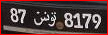

(['87 07y 8179'], 1)

In [ ]:
j=939
cv2_imshow((cv2.imread(f'results/result_{j}.png')))
reader.readtext(cv2.imread(f'results/result_{j}.png'),detail=0),len(reader.readtext(cv2.imread(f'results/result_{j}.png'),detail=0))
#some visualisation to better understanding the mistakes & try to improve the ocr operation

In [ ]:
finals[41]

['1', '2']

In [ ]:
for i in range(len(finals)):
  if len(finals[i])!=2:
    print(i)
#verifying if there any finals[i] has not the form ['n1','n2'] before passing to the read_result function

In [ ]:
finals_2=finals.copy()

In [ ]:
read_result(['96', '5370']) #testing the read_result function

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
read_result(['75','121'])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
read_result(['',''])

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [ ]:
#the sumbission CVS file
import pandas as pd
subm=pd.read_csv('/content/SampleSubmission (3).csv')
subm[100:120]

,id,0,1,2,3,4,5,6,7,8,9
100,img_915_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,img_915_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,img_915_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,img_915_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,img_915_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,img_917_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,img_917_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,img_917_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,img_917_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,img_917_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(finals),len(subm)/7 #every image has 7 lines 

(210, 210.0)

In [ ]:
read_result(['000','000'])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
p=0
for i in range(0,len(subm),7):
    print(i,i+7,p)
    subm.iloc[i:i+7,1:]=read_result(finals_2[p])
    p=p+1
#filling the sumbission dataframe by blocs of 7 (the result of read_result function applied on each element of the array)

0 7 0
7 14 1
14 21 2
21 28 3
28 35 4
35 42 5
42 49 6
49 56 7
56 63 8
63 70 9
70 77 10
77 84 11
84 91 12
91 98 13
98 105 14
105 112 15
112 119 16
119 126 17
126 133 18
133 140 19
140 147 20
147 154 21
154 161 22
161 168 23
168 175 24
175 182 25
182 189 26
189 196 27
196 203 28
203 210 29
210 217 30
217 224 31
224 231 32
231 238 33
238 245 34
245 252 35
252 259 36
259 266 37
266 273 38
273 280 39
280 287 40
287 294 41
294 301 42
301 308 43
308 315 44
315 322 45
322 329 46
329 336 47
336 343 48
343 350 49
350 357 50
357 364 51
364 371 52
371 378 53
378 385 54
385 392 55
392 399 56
399 406 57
406 413 58
413 420 59
420 427 60
427 434 61
434 441 62
441 448 63
448 455 64
455 462 65
462 469 66
469 476 67
476 483 68
483 490 69
490 497 70
497 504 71
504 511 72
511 518 73
518 525 74
525 532 75
532 539 76
539 546 77
546 553 78
553 560 79
560 567 80
567 574 81
574 581 82
581 588 83
588 595 84
595 602 85
602 609 86
609 616 87
616 623 88
623 630 89
630 637 90
637 644 91
644 651 92
651 658 93
658 665 

In [ ]:
subm.tail(50)

,id,0,1,2,3,4,5,6,7,8,9
1420,img_1106_7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1421,img_1107_1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1422,img_1107_2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1423,img_1107_3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,img_1107_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1425,img_1107_5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1426,img_1107_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1427,img_1107_7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1428,img_1108_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1429,img_1108_2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
subm.isna().sum()

id    0
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
dtype: int64

In [ ]:
from google.colab import files
subm.to_csv('subm.csv',index=False)
files.download('subm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
subm.tail(50)
#we can verify the last one is correct: 100 5333 

,id,0,1,2,3,4,5,6,7,8,9
1420,img_1106_7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1421,img_1107_1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1422,img_1107_2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1423,img_1107_3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1424,img_1107_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1425,img_1107_5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1426,img_1107_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1427,img_1107_7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1428,img_1108_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1429,img_1108_2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
subm.head(50)

,id,0,1,2,3,4,5,6,7,8,9
0,img_901_1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,img_901_2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,img_901_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,img_901_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,img_901_5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,img_901_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,img_901_7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,img_902_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,img_902_2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,img_902_3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I will try to make some tresholds to improve the results of easy_ocr & I'll work on exceptions.